In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import requests
from BinanceCollector import BinanceCollector
from datetime import datetime

In [2]:
df = pd.read_csv("./Data/Trades/BNBUSDT-trades-2022-12-19.csv")

In [3]:
df["order_value"] = df["qty"]*df["price"]

# for index,rows in df.iterrows():
#     df["clean_time"] = datetime.fromtimestamp(rows["time"]/1000.0).strftime("%H:%M:%S")
df["clean_time"] = pd.to_datetime(df["time"],unit="ms")

In [4]:
# false -> BUY
# true -> SELL
df.tail()

,id,price,qty,quote_qty,time,is_buyer_maker,order_value,clean_time
1308137,884809527,240.23,0.04,9.609,1671494399573,True,9.6092,2022-12-19 23:59:59.573
1308138,884809528,240.23,2.68,643.816,1671494399583,True,643.8164,2022-12-19 23:59:59.583
1308139,884809529,240.24,0.04,9.609,1671494399907,False,9.6096,2022-12-19 23:59:59.907
1308140,884809530,240.24,0.29,69.669,1671494399907,False,69.6696,2022-12-19 23:59:59.907
1308141,884809531,240.23,0.14,33.632,1671494399921,True,33.6322,2022-12-19 23:59:59.921


In [7]:
# SELL QTY
sum(df[ df["is_buyer_maker"] ]["order_value"])

539400745.99335

In [20]:
# BUY QTY
sum(df[ ~df["is_buyer_maker"] ]["order_value"])

537251321.9904689

In [21]:
buyers = df[ ~df["is_buyer_maker"] ]
sellers = df[ df["is_buyer_maker"] ]

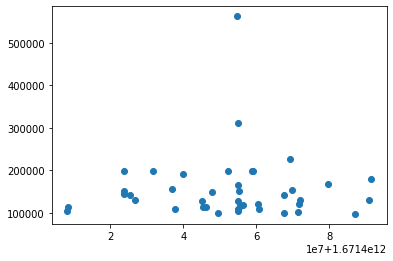

In [22]:
tmp = buyers[ buyers["qty"] > 400 ]
plt.scatter(tmp["time"],tmp["order_value"])

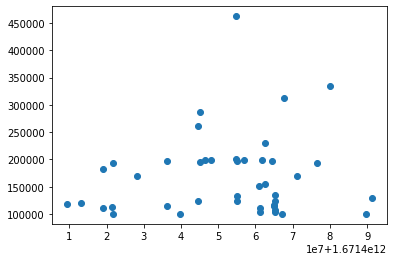

In [23]:
tmp = sellers[ sellers["qty"] > 400 ]
plt.scatter(tmp["time"],tmp["order_value"])

In [25]:
sellers.head()

,id,price,qty,quote_qty,time,is_buyer_maker,order_value,clean_time
1,883501318,250.76,2.00,501.520,1671408000122,True,501.5200,2022-12-19 00:00:00.122
2,883501319,250.75,0.73,183.047,1671408000122,True,183.0475,2022-12-19 00:00:00.122
5,883501322,250.75,1.91,478.932,1671408002814,True,478.9325,2022-12-19 00:00:02.814
6,883501323,250.75,8.00,2006.000,1671408002814,True,2006.0000,2022-12-19 00:00:02.814
7,883501324,250.74,0.71,178.025,1671408002814,True,178.0254,2022-12-19 00:00:02.814


In [28]:
buyers.head()

,id,price,qty,quote_qty,time,is_buyer_maker,order_value,clean_time
0,883501317,250.77,0.02,5.015,1671408000108,False,5.0154,2022-12-19 00:00:00.108
3,883501320,250.76,0.19,47.644,1671408000134,False,47.6444,2022-12-19 00:00:00.134
4,883501321,250.76,0.85,213.146,1671408000134,False,213.1460,2022-12-19 00:00:00.134
12,883501329,250.76,0.39,97.796,1671408003898,False,97.7964,2022-12-19 00:00:03.898
13,883501330,250.76,3.98,998.024,1671408003921,False,998.0248,2022-12-19 00:00:03.921


In [9]:
2149424.0028811693 * 82

176252768.23625588